# INSEE’s premises

In [1]:
import geopandas
import re
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib, descartes

from pynsee.sirene import search_sirene
from pynsee.geodata import get_geodata_list, get_geodata

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import logging
import sys
logging.basicConfig(stream=sys.stdout,
                    level=logging.INFO, 
                    format="%(message)s")

Subscribe to api.insee.fr and get your credentials!

Save your credentials with init_conn function :
```python
from pynsee.utils import init_conn
init_conn(sirene_key="my_sirene_key")
```

Beware : any change to the keys should be tested after having cleared the cache  
Please do : ``from pynsee.utils import clear_all_cache; clear_all_cache()``

In [3]:
import os
os.environ['sirene_key'] = "f7345356-8301-4567-b453-568301456723"

In [4]:
variable = ["denominationUniteLegale", 'sigleUniteLegale', 'categorieJuridiqueUniteLegale']

insee_pattern = "INSTITUT NATIONAL DE LA STATISTIQUE ET DES ETUDES ECONOMIQUES"

pattern = [insee_pattern, 'INSEE', '7120']
# 7120 : Service central d'un ministère

data = search_sirene(variable = variable, pattern = pattern, kind="siret")

Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/acaae682614742b3fc8d1b32c8e57c06.parquet
Creation date: 2025-06-28, today
Set update=True to get the most up-to-date data


In [5]:
gdf = data.get_location()

This function returns data made available by OpenStreetMap and its contributors.
Please comply with Openstreetmap's Copyright and ODbL Licence
INSEE API credentials have not been found: please try to reuse pynsee.init_conn to save them locally.
Otherwise, you can still use environment variables as follow:

import os
os.environ['sirene_key'] = 'my_sirene_key'
Existing environment variable sirene_key used, instead of locally saved credentials


Getting location:   0%|          | 0/32 [00:00<?, ?it/s]

Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/6b05d2e8cf8de48b5a73c9a400c8c4c1.json
Set update=True to get the most up-to-date data
Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/b8a82eb66c63b83c98f2e2a4bf25bc11.json
Set update=True to get the most up-to-date data
Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/8f30fd18cb688dafa93fe22a82443ade.json
Set update=True to get the most up-to-date data
Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/50abc53ac9ba98eabaed84a40aa7ca8e.json
Set update=True to get the most up-to-date data
Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/8f614709b2a3e103afda2454a5678ab6.json
Set update=True to get the most up-to-date data
Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/bf44d6f7f8d1c27ae4efdb0ae7a239dd.json
Set update=True to get the most up-to-date data
Previously saved data has been used:
/home/onyxia/.cache/p

Getting location:   0%|          | 0/3 [00:00<?, ?it/s]

Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/76ce91da17c666e71b9ba4ad4020629d.json
Set update=True to get the most up-to-date data
Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/f224a1c88bd3afe1d2def2af095851ab.json
Set update=True to get the most up-to-date data
Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/952870fe54e1acc305187a4692b985e6.json
Set update=True to get the most up-to-date data


Getting location: 100%|██████████| 3/3 [00:00<00:00, 1585.35it/s]


In [6]:
# move overseas departement closer to metropolitan France
gdf = gdf.transform_overseas().zoom()

Converting GeoDataFrame to EPSG:3857.
Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/f2bbdea5546ef02791b1286f1b6b1a51.parquet
Creation date: 2025-06-28, today
Set update=True to get the most up-to-date data


Finding departement: 100%|██████████| 32/32 [00:00<00:00, 1051.00it/s]

NR is missing from code_insee_du_departement column !


In [7]:
for i, row in gdf.iterrows():
    gdf.loc[i, 'name'] = str(i + 1) + ' - ' + row.enseigne1Etablissement
    gdf.loc[i, 'i'] = i + 1
    
# cleaning
gdf = gdf[~gdf.geometry.isnull()]

In [8]:
geodataList =  get_geodata_list()
mapdep = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:departement')

# move overseas departement closer to metropolitan France
# add a zoom on ile de France region
mapdep = mapdep.transform_overseas().zoom()
mapdep.head()

Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/e879822687bab4b12f23762b5d56742b.parquet
Creation date: 2025-06-28, today
Set update=True to get the most up-to-date data
Previously saved data has been used:
/home/onyxia/.cache/pynsee/pynsee/7a91d3072047b4ad17253bc108ef87cf.parquet
Creation date: 2025-06-28, today
Set update=True to get the most up-to-date data
NR is missing from code_insee_du_departement column !


,geometry,cleabs,nom_officiel,nom_officiel_en_majuscules,code_insee,code_insee_de_la_region,code_siren,code_insee_du_departement
0,"MULTIPOLYGON (((277926.054 5709617.925, 277848...",DEPARTEM0000000000000063,Puy-de-Dôme,PUY-DE-DOME,63,84,226300010,63
1,"MULTIPOLYGON (((336295.261 6472777.256, 336428...",DEPARTEM0000000000000059,Nord,NORD,59,32,225900018,59
2,"MULTIPOLYGON (((-91403.654 6186431.719, -91543...",DEPARTEM0000000000000061,Orne,ORNE,61,28,226100014,61
3,"MULTIPOLYGON (((582085.39 5342294.655, 582092....",DEPARTEM0000000000000013,Bouches-du-Rhône,BOUCHES-DU-RHONE,13,93,221300015,13
4,"MULTIPOLYGON (((259950.061 6258104.764, 260905...",DEPARTEM0000000000000075,Paris,PARIS,75,11,227500055,75


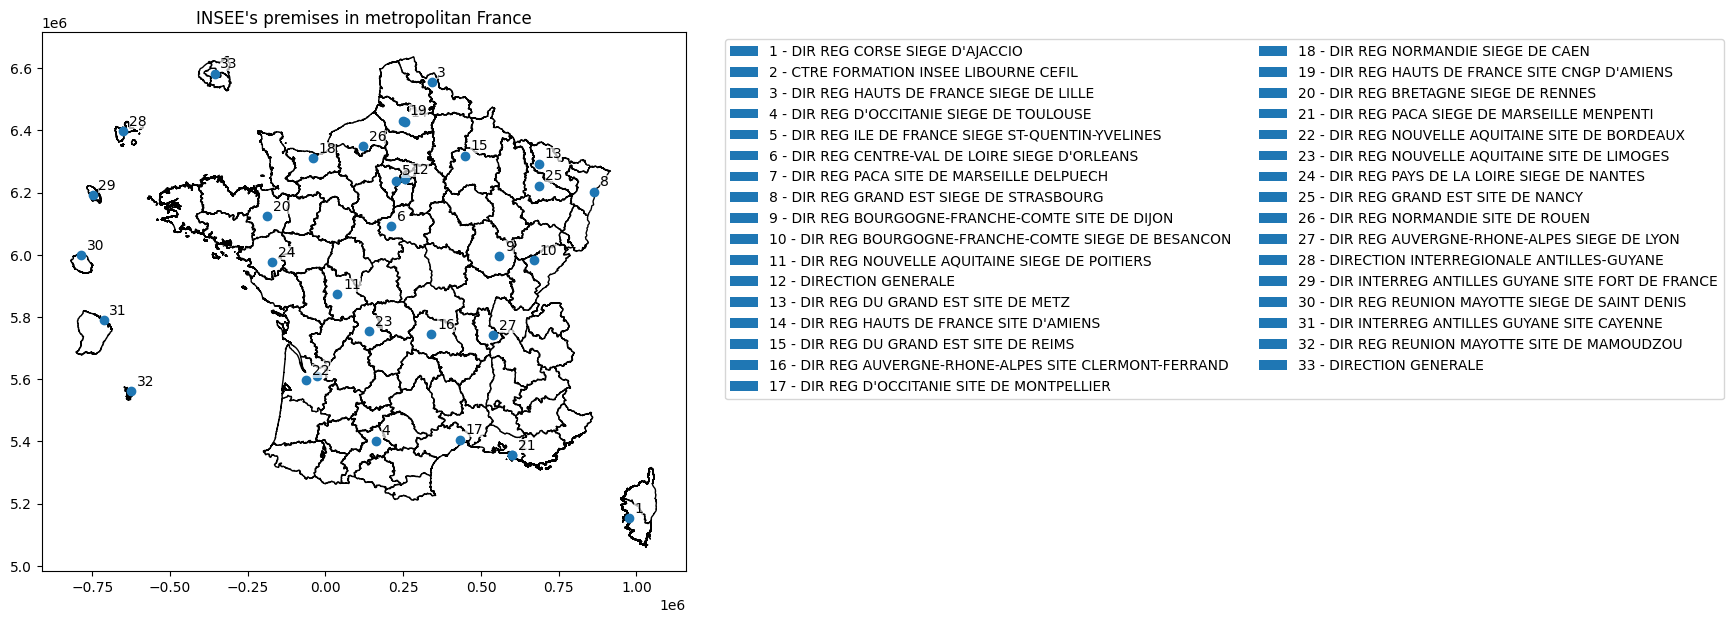

In [9]:
# plot
ax = mapdep.plot(color='white', edgecolor='black', figsize = (15,7))

gdf.plot(ax=ax)
plt.title("INSEE's premises in metropolitan France")

for x, y, i, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.i, gdf.name):
    ax.annotate(int(i), xy=(x, y), xytext=(4, 4), textcoords="offset points",
                bbox=dict(boxstyle='square,pad=0', fc="#ffffffb0", ec='none'))

legends = [mpatches.Patch(label=f) for f in gdf.name]
plt.legend(handles=legends, ncol=2, bbox_to_anchor=(1.05, 1))
plt.show()